In [1]:
import kagglehub
import pandas as pd;
import numpy as np;

# Download latest version
path = kagglehub.dataset_download("sukhmandeepsinghbrar/car-price-prediction-dataset")
data = pd.read_csv(path+'/cardekho.csv', index_col=False)

100%|██████████| 141k/141k [00:00<00:00, 662kB/s]

Extracting files...


In [2]:
df = pd.DataFrame(data)

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [4]:
df.rename(columns={'mileage(km/ltr/kg)' : 'mileage_km_per_ltr', 'max_power' : 'max_power_bhp'}, inplace= True)

In [5]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_km_per_ltr,engine,max_power_bhp,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [6]:
df['max_power_bhp'] = pd.to_numeric(df['max_power_bhp'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage_km_per_ltr  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power_bhp       7912 non-null   float64
 11  seats               7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [7]:
abnormal_col_list = ['km_driven', 'mileage_km_per_ltr', 'engine', 'max_power_bhp']
for col in abnormal_col_list:
  df.loc[df[col] <= 1, col] = np.nan

it converts some of the values showing abnormal inconsisties. so the inconsistent values are changed into null values.

In [8]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,1
fuel,0
seller_type,0
transmission,0
owner,0
mileage_km_per_ltr,238
engine,221


In [10]:
condition = df['name'].str.startswith('Land')
df['brand'] = np.select([condition], [df['name'].str.split(' ').str[:2].str.join(' ')] , df['name'].str.split(' ').str[0])

In [11]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land Rover', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [12]:
df['mileage_km_per_ltr'] = (
    df.groupby('fuel')['mileage_km_per_ltr']
      .transform(lambda x: x.fillna(x.median()))
)

In [13]:
df['engine'] = (
    df.groupby('brand')['engine']
    .transform(lambda x : x.fillna(x.median()))
    )

In [14]:
df['max_power_bhp'] = (
    df.groupby('engine')['max_power_bhp']
    .transform(lambda x : x.fillna(x.median()))
)

In [15]:
df['seats'] = (
    df.groupby('brand')['seats']
    .transform(lambda x : x.fillna(x.mode()[0]) if not x.mode().empty else x)
)

In [16]:
df['km_driven'] = (
    df.groupby('year')['km_driven']
    .transform(lambda x : x.fillna(x.median()))
)

In [17]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage_km_per_ltr,0
engine,1


there are each one value is missing. when i find it in the data it is the Peugeot brands only one vehicle is there so the groupby will work but there is no value to add as median or mode. So we adding it manually for that particular model only.

In [18]:
df.loc[(df['brand'] == 'Peugeot'), ['engine', 'max_power_bhp', 'seats']] = [1900, 65, 5]

In [19]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage_km_per_ltr,0
engine,0


In [20]:
df.duplicated().sum()

np.int64(1202)

In [21]:
df.drop_duplicates(keep = 'first', inplace= True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   float64
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage_km_per_ltr  6926 non-null   float64
 9   engine              6926 non-null   float64
 10  max_power_bhp       6926 non-null   float64
 11  seats               6926 non-null   float64
 12  brand               6926 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 757.5+ KB


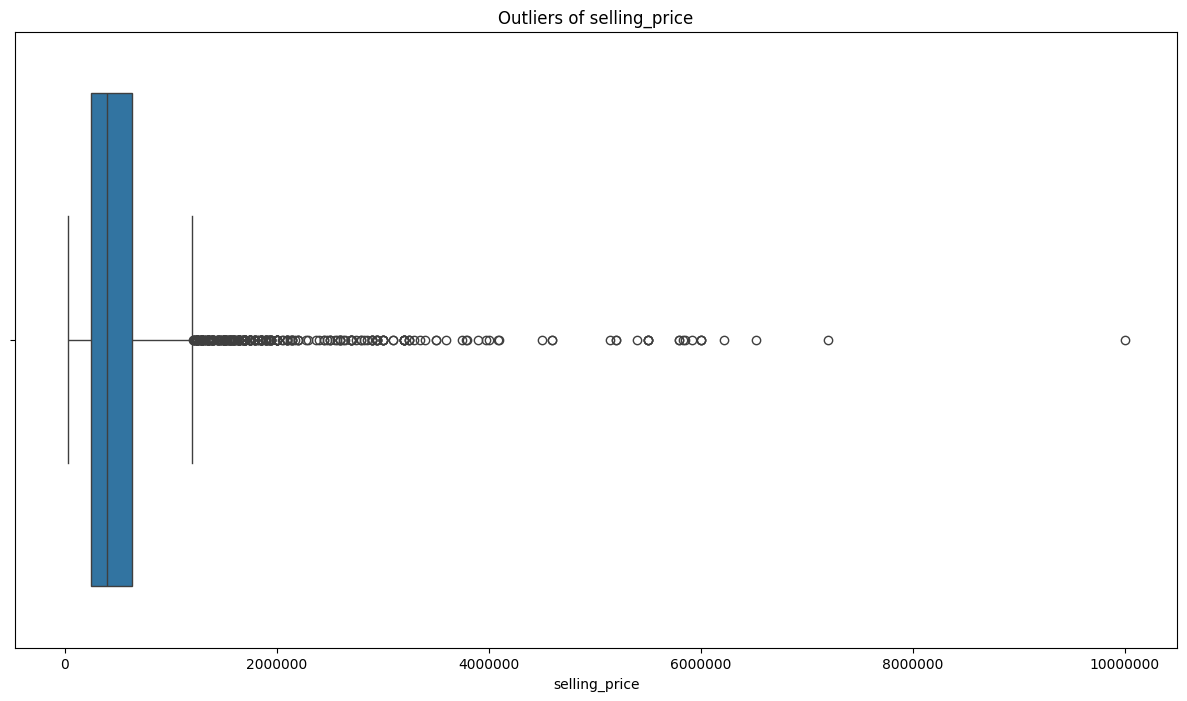

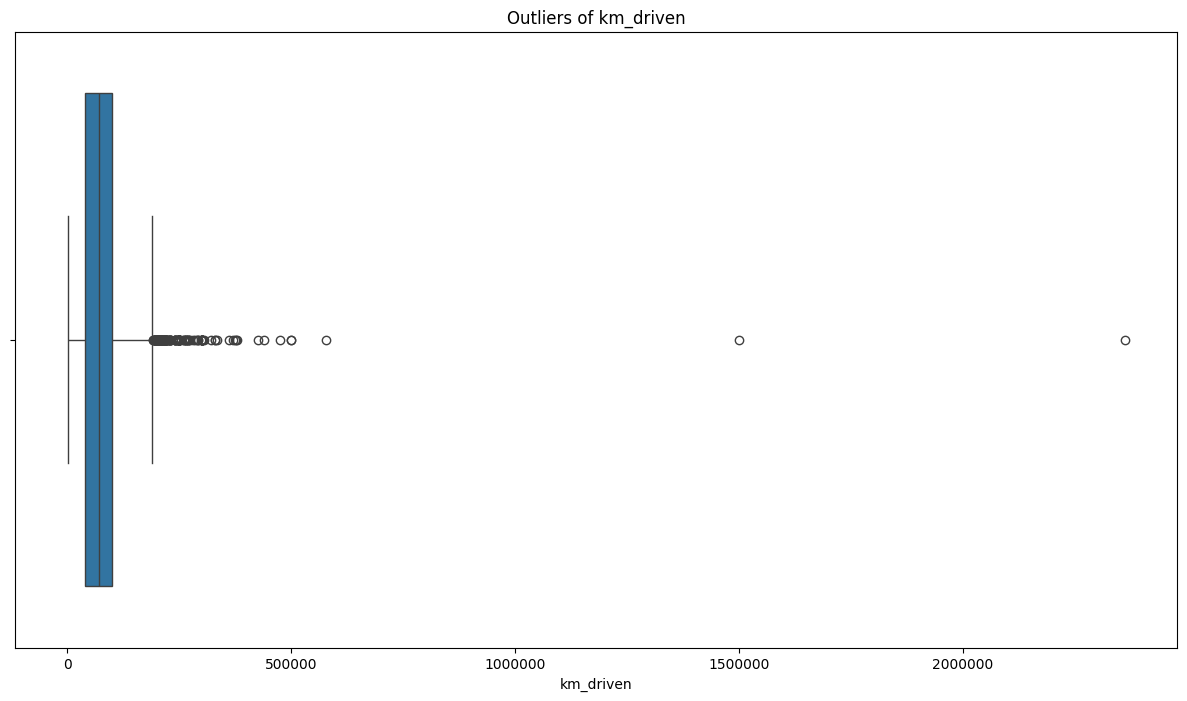

In [24]:
import matplotlib.pyplot as plt;
import seaborn as sns;

checking_column = ['selling_price', 'km_driven']

for col in checking_column:
  plt.figure(figsize=(15,8))
  sns.boxplot(data = df, x = col)
  plt.title(f'Outliers of {col}')
  plt.ticklabel_format(style = 'plain', axis= 'x')
  plt.show()

# Interpretation
Both selling_price and km_driven shows right-sided outliers
Outliers are retained at this stage because:
- Extreme prices may represent luxury vehicles
- High mileage may reflect commercial usage
- Removing them prematurely may result in loss of meaningful information


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   float64
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage_km_per_ltr  6926 non-null   float64
 9   engine              6926 non-null   float64
 10  max_power_bhp       6926 non-null   float64
 11  seats               6926 non-null   float64
 12  brand               6926 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 757.5+ KB


In [29]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,6926,2058,Maruti Swift Dzire VDI,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,6926.0,NaN,NaN,NaN,2013.4203,4.078286,1983.0,2011.0,2014.0,2017.0,2020.0
selling_price,6926.0,NaN,NaN,NaN,517270.678458,519766.985985,29999.0,250000.0,400000.0,633500.0,10000000.0
km_driven,6926.0,NaN,NaN,NaN,74008.610165,58351.619793,1000.0,40000.0,70000.0,100000.0,2360457.0
fuel,6926,4,Diesel,3755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_type,6926,3,Individual,6218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,6926,2,Manual,6342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,6926,5,First Owner,4242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage_km_per_ltr,6926.0,NaN,NaN,NaN,19.508988,3.888217,9.0,17.0,19.44,22.32,42.0
engine,6926.0,NaN,NaN,NaN,1433.294109,493.86642,624.0,1197.0,1248.0,1498.0,3604.0


In [30]:
df.to_csv("cleaned_day2.csv", index=False)